<div style="height:300;background-color:#021A36;color:white;border-radius: 15px;padding:10px">
    <h1>Debunking modeling procedure: ID_44</h1>
    <h2></h2>
    <hr>
    <h3>By: Gari Ciodaro Guerra</h3>
</div>
 	

# ID_44
+ new_precision: 0.931818 	
+ new_f1_score: 0.796117 
+ p_value: 0.000116
+ mean_HEALTHY: 0.292100
+ mean_ADHD: 0.612615 	
+ pre_processing: Raw 110 channels 
+ Features: alpha_beta 
+ Machine_learning_technique: resnet18
+ Transformation: none
+ train score: The CNN was allowed to a train_loss() of 0.075924 (The negative log likelihood loss)
+ precision: 0.9 (before removing problematics subjects)
                                      

<img src="./img_ID_44/resnet34.png">
<p>Example of Restnet 34 architecture. I used Resnet 18 version</p>
<p>Taken from <a href="https://arxiv.org/pdf/1512.03385.pdf">Deep Residual Learning for Image Recognition</a></p>

In [1]:
from fastai.vision import *
from fastai.metrics import *
from fastai.callbacks import *
import torchvision.models as models
from fastai.callbacks.hooks import *
import imageio
from scipy.stats import ttest_ind,bartlett
import mne
import seaborn as sns

#AUxiliar class to load pickle objects from disk
path_to_class="/home/gari/Desktop/master_tesis_v3/MLDiagnosisTool/Classes/"
sys.path.append(path_to_class)
from OFHandlers import OFHandlers as OFH


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import (roc_auc_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             average_precision_score,
                             accuracy_score,
                             balanced_accuracy_score,
                             roc_curve)

#auxiliar dictionary of models from pytorch
dic_models={"resnet18":models.resnet18,
            "resnet50":models.resnet50,
            "alexnet":models.alexnet,
            "squeezenet1_0":models.squeezenet1_0
            }

In [2]:
# path where the experiment is stored (trained model)
experiment="alpha_beta"
path="/home/gari/Desktop/master_tesis_v3/Data/Datasets_image_"+experiment

In [19]:
path_to_channels_location="/home/gari/Desktop/master_tesis_v3/Data/MontageForClustering/"
channels_location=pd.read_csv(path_to_channels_location+"GSN_HydroCel_129_chanlocs.csv")

Text(0.5, 1, 'schematic plot of what was fed to the CNN')

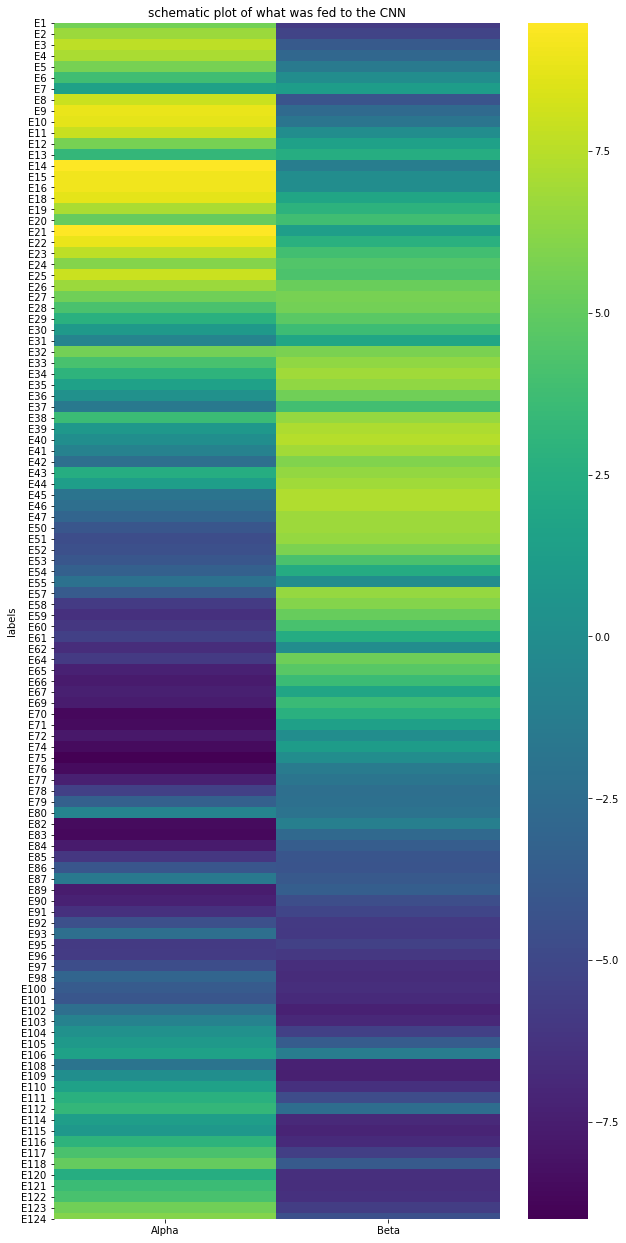

In [241]:
#JUST AN EXAMPLE, VALUES DONT REFLEX REALITY!
channel_temp=channels_location.set_index("labels")
channel_temp.rename(columns={"X":"Alpha","Y":"Beta"},inplace=True)
fig=plt.figure(figsize=(10,22))
ax=fig.add_subplot(111)
sns.heatmap(channel_temp[["Alpha","Beta"]].drop("Cz",axis=0),ax=ax,cmap="viridis")
ax.set_title("schematic plot of what was fed to the CNN")

In [3]:
# general configurations
string_model="resnet18"
bs=50
pretrained=True
ps=0.5
unfreeze_net=True
number_epochs=10
track_save_callback=False

In [4]:
# the databunch object
data = ImageDataBunch.from_folder(path,bs=bs).normalize(imagenet_stats)

/home/gari/anaconda3/envs/fast_ai/lib/python3.7/site-packages/fastai/data_block.py:457: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


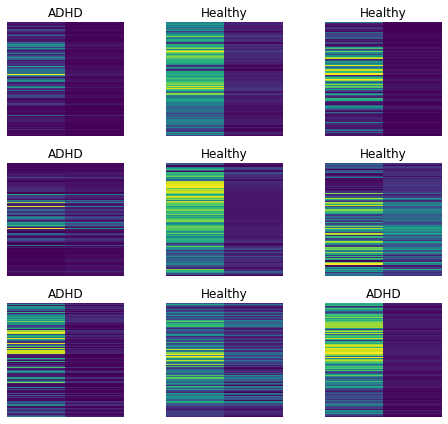

In [5]:
#Example of the data images
data.show_batch(rows=3, figsize=(7,6))

In [6]:
#create the object "learn", the same way as in training.
learn = cnn_learner(data,dic_models.get(string_model),
                        metrics=[accuracy, AUROC()],
                        pretrained=pretrained,
                        ps=ps)

In [7]:
#load the trained weights
learn.load("stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (995 items)
x: ImageList
Image (3, 380, 390),Image (3, 380, 390),Image (3, 380, 390),Image (3, 380, 390),Image (3, 380, 390)
y: CategoryList
Healthy,Healthy,Healthy,Healthy,Healthy
Path: /home/gari/Desktop/master_tesis_v3/Data/Datasets_image_alpha_beta;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /home/gari/Desktop/master_tesis_v3/Data/Datasets_image_alpha_beta;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tr

In [8]:
# path to subjects IDs
path_identity="/home/gari/Desktop/master_tesis_v3/Data/IdDataSet/"
df_train_identity=OFH.load_object(path_identity+"df_train_identity.file")
df_test_identity=OFH.load_object(path_identity+"df_test_identity.file")

<div style="background-color:#021A36;color:white;border-radius: 15px;padding:5px">
    <h2>Heatmaps: What regions of the feature images got activated?</h2>
</div>

In [9]:
#load test subjects mapping-> imgage.png,label
path_to_test_file="/home/gari/Desktop/master_tesis_v3/Data/Datasets_image_alpha_beta/test_fast_ai.file"
test_fast_ai=OFH.load_object(path_to_test_file)

#load phonotypical information, subject_id + pheno
subjects_12=OFH.load_object("/home/gari/Desktop/master_tesis_v3/Data/subjects_12.file")

#join both
subjects_maps_fast_ai=df_test_identity.join(test_fast_ai)


m = learn.model.eval();
path_test_N='/home/gari/Desktop/master_tesis_v3/Data/Datasets_image_alpha_beta/test_N/'    

<div style="background-color:#021A36;color:white;border-radius: 15px;padding:5px">
    <h4>Auxiliar functions</h4>
</div>

In [185]:
def hooked_backward(xb,cat,each_image):
    """
    Average and save the last convolutional layer
    activation.
    """
    with hook_output(m[0]) as hook_a: 
        with hook_output(m[0], grad=True) as hook_g:
            preds = m(xb)
            preds[0,cat].backward()
            img = open_image(path_test_N+each_image)
            p=learn.predict(img)
            tensor = p[2]
            single_pred=tensor.cpu().detach().numpy()[0]
    return hook_a,hook_g,single_pred


def explore_activation_subjects(subject_id,title="Activations"):
    """
    Plot the activations of the convolutional layer
    of the 5 subsets of 20 seconds signal of a particuar
    subject.
    """
    title=title+" "+subject_id
    df=subjects_maps_fast_ai[subjects_maps_fast_ai["test_patient_id"]==subject_id]
    fig= plt.figure(figsize=(15,11))
    ax0=fig.add_subplot(2,3,1)
    ax1=fig.add_subplot(2,3,2)
    ax2=fig.add_subplot(2,3,3)
    ax3=fig.add_subplot(2,3,4)
    ax4=fig.add_subplot(2,3,5)
    axes_dict={0:ax0,
          1:ax1,
          2:ax2,
          3:ax3,
          4:ax4}
    
    for index,each_png in enumerate(df.name):
        x=open_image(path_test_N+each_png)
        xb,_ = data.one_item(x)
        xb = xb.cuda()
        hook_a,hook_g,single_pred= hooked_backward(xb,0,each_png)
        #print(pred,single_pred)
        
        acts  = hook_a.stored[0].cpu()
        avg_acts = acts.mean(0)
        x.show(axes_dict.get(index))
        #show_heatmap(avg_acts,title+"-"+ each_png+" pred:"+str(single_pred))
        axes_dict.get(index).imshow(avg_acts, alpha=0.69, extent=(0,352,352,0),
                  interpolation='bilinear', cmap='Reds')
        axes_dict.get(index).set_title(each_png+"| pred:"+str(round(single_pred,3)))
    fig.suptitle(title, fontsize=14)

<div style="background-color:#021A36;color:white;border-radius: 15px;padding:10px">
    <h4>Subject NDARJE086YU0 can be argued as a safe ADHD-Combined Type, in the sense that it was classified 31 times as  ADHD, by the 36 observed modeling procedures, and its true label is ADHD. Additionally, the probabilty of its 5 segments is very skewed around 0.98.</h4>
</div>

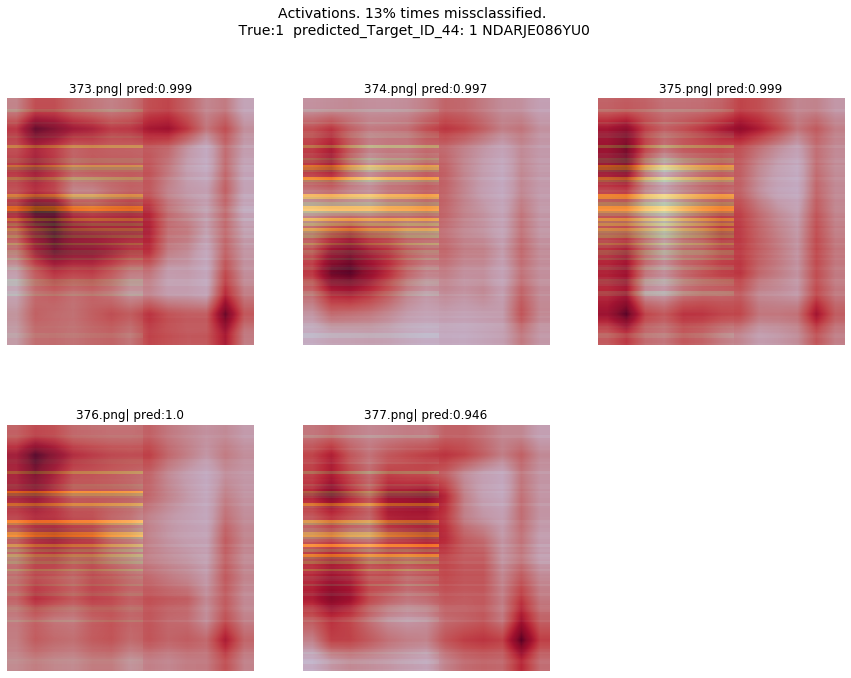

In [186]:
#COMBINED TYPE
explore_activation_subjects("NDARJE086YU0",("Activations. 13% times missclassified.\n True:1 "+
                            " predicted_Target_ID_44: 1"))

<div style="background-color:#021A36;color:white;border-radius: 15px;padding:5px">
    <h4>The NDARCJ475WJP  can be argued as a controversial ADHD-Combined Type subject. It was classified 28 times as Healthy by the 36 observed modeling procedures, however its true label is ADHD. Was this patient incorrectly labeled by doctors? Also notice how the probability of its 5 segments is very skewed around 0.0, which means that ID_44 is very sure that this subject is healthy. Another explanation for this is that ADHD diagnosed by doctors is not always detectable on the resting EEG, and perhaps while performing a cognitive task the problem could be detected.</h4>
</div>

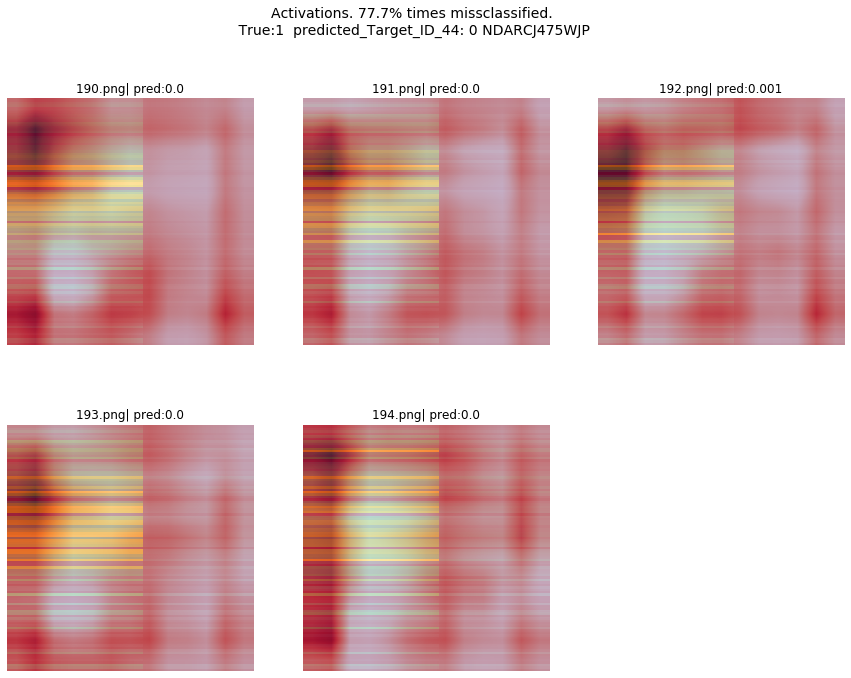

In [187]:
#COMBINED TYPE
explore_activation_subjects("NDARCJ475WJP",("Activations. 77.7% times missclassified.\n True:1 "+
                            " predicted_Target_ID_44: 0"))

<div style="background-color:#021A36;color:white;border-radius: 15px;padding:10px">
    <h4>The NDARUF152ARR  can be argued as a safe Healthy subject. It was classified 28 times as Healthy by the 36 observed modeling procedures,  its true label is Healthy. We see that some of the segments contain ADHD visual characteristics, however the overall prediction is 0.37, Healthy</h4>
</div>

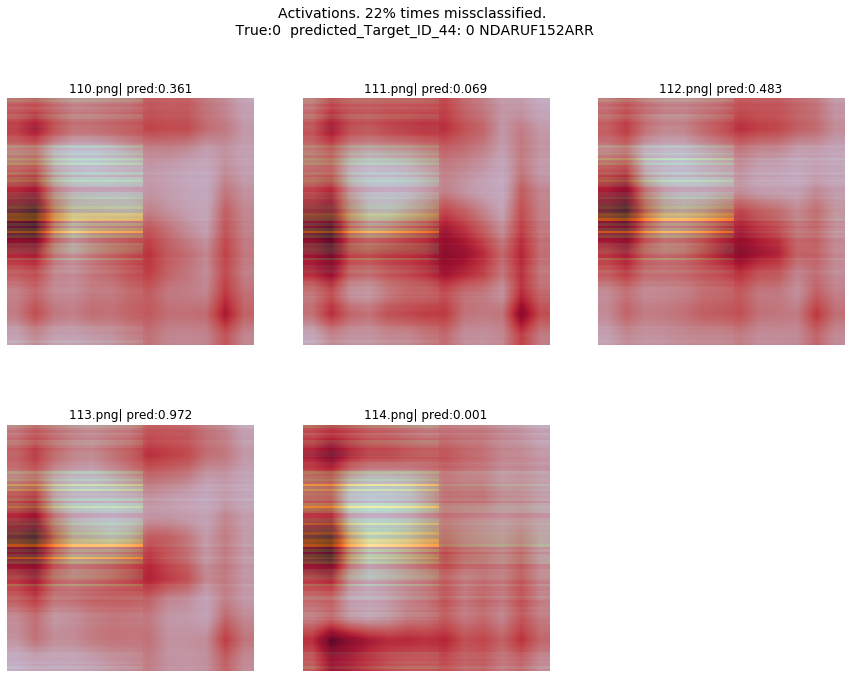

In [188]:
explore_activation_subjects("NDARUF152ARR",("Activations. 22% times missclassified.\n True:0 "+
                            " predicted_Target_ID_44: 0"))
#NO DIAGNOSIS
#explore_activation_subjects("NDARUF152ARR")

<div style="background-color:#021A36;color:white;border-radius: 15px;padding:10px">
    <h4>Inspection of activations seems to suggest that CNN is making decisions based on over-activation of beta power in lower channels (see list csv locataions) and beta and alpha interactions in intermediate channels. Let's try this hypothesis</h4>
</div>

In [14]:
# load road data (before it was converted into images)
prepared_test_signal=OFH.load_object("./Datasets_alpha_beta/prepared_test_data_set.file")

In [184]:
prepared_test_signal.head()

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,target
0,0.016137,0.003634,0.022518,0.005154,0.044603,0.009591,0.041731,0.009226,0.192123,0.027094,...,0.003484,0.016596,0.003494,0.013020,0.003223,0.024285,0.005981,0.023391,0.005818,1
1,0.012482,0.003445,0.017463,0.004639,0.027009,0.006392,0.030095,0.008360,0.068932,0.015055,...,0.003159,0.013233,0.003358,0.011783,0.003091,0.019882,0.005788,0.022151,0.005284,1
2,0.016716,0.006235,0.018139,0.007011,0.027203,0.008122,0.028609,0.008480,0.082541,0.015301,...,0.005862,0.017869,0.006180,0.014353,0.005347,0.018489,0.006798,0.017693,0.006911,1
3,0.019452,0.005301,0.021585,0.005940,0.038851,0.009093,0.039474,0.010863,0.078290,0.017482,...,0.005304,0.020079,0.005039,0.019485,0.005402,0.024140,0.006582,0.022611,0.007130,1
4,0.038711,0.039485,0.044402,0.037693,0.040796,0.024132,0.047131,0.022573,0.093022,0.021086,...,0.036743,0.037943,0.038094,0.036702,0.040055,0.039250,0.032868,0.035276,0.027810,1


In [16]:
#get the columns that belongs to alpha
# and beta

i=0
list_alpha=[]
list_beta=[]
for each_col in prepared_test_signal.columns:
    if i==0:
        list_alpha.append(each_col)
    elif i==1:
        list_beta.append(each_col)
        i=-1
    i=i+1
list_alpha.pop(-1)        
    

'target'

In [17]:
len(list_alpha)


110

In [18]:
len(list_beta)

110

In [237]:
channel_temp

,Beta,Alpha,Z,sph_theta,sph_phi,sph_radius,theta,radius,type,ref,urchan
labels,,,,,,,,,,,
E1,-5.787678,5.520863e+00,-2.577469,-46.351589,-17.861075,8.403600,46.351589,0.599228,NaN,NaN,4
E2,-5.291805,6.709098e+00,0.307435,-38.264632,2.060544,8.550421,38.264632,0.488553,NaN,NaN,5
E3,-3.864122,7.634241e+00,3.067770,-26.846561,19.724406,9.089790,26.846561,0.390420,NaN,NaN,6
E4,-2.868838,7.145709e+00,4.989565,-21.874325,32.942748,9.175355,21.874325,0.316985,NaN,NaN,7
E5,-1.479340,5.686621e+00,6.812878,-14.581944,49.223267,8.996745,14.581944,0.226537,NaN,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...
E121,-6.550733,3.611543e+00,-3.353156,-61.131219,-24.144932,8.197500,61.131219,0.634139,NaN,NaN,124
E122,-6.399087,4.127249e+00,-0.356852,-57.179011,-2.683150,7.622981,57.179011,0.514906,NaN,NaN,125
E123,-5.682548,5.453384e+00,2.836565,-46.178909,19.806731,8.371192,46.178909,0.389963,NaN,NaN,126


In [21]:
#get a map of features to labels
index_label_map={}
for index,label in enumerate(channels_location.labels):
    index_label_map[index]=label

In [22]:
index_label_map.get(0)

'E1'

In [23]:
target_adhd=prepared_test_signal[prepared_test_signal["target"]==1][["target"]]
target_healthy=prepared_test_signal[prepared_test_signal["target"]==0][["target"]]

alpha_signals=prepared_test_signal[list_alpha]
beta_signals=prepared_test_signal[list_beta]

In [24]:
def print_ttest(list_channels,signal_adhd,signal_healthy,title_test,th=0.05):
    for counter,each_channel in enumerate(list_channels):
        t_test=ttest_ind(signal_adhd[each_channel],
                         signal_healthy[each_channel]
                         ,equal_var=True)
        if(t_test[-1]<=th):
            print("*"*100)
            print("signficance "+title_test+" test channel "+str(each_channel),
                                              " label:",
                                              channels_location.iloc[counter].labels)
            chanel_loc=channels_location.iloc[counter]

            mean_alpha_adhd=signal_adhd[each_channel].mean()
            mean_alpha_healthy=signal_healthy[each_channel].mean()

            if(mean_alpha_adhd>mean_alpha_healthy):
                color_dot="red"
                label="ADHD>Healthy:"+index_label_map[counter]
            else:
                color_dot="blue"
                label="ADHD<Healthy:" +index_label_map[counter]

            print(t_test[-1])
            print("mean "+title_test+ " power ADHD",  mean_alpha_adhd)
            print("mean "+title_test+ " power Healthy",mean_alpha_healthy)
            print("*"*100)

In [103]:
#%matplotlib inline

In [104]:
def three_d_plot_of_significance(list_channels,signal_adhd,
                                 signal_healthy,title_test,th=0.05):

    for each_angle in np.arange(0,360,10):
        
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111, projection='3d')
        txt="Red for ADHD>Healthy. Blue ADHD<Healthy with p<"+str(th)

        for counter,each_channel in enumerate(list_channels):
            t_test=ttest_ind(signal_adhd[each_channel],
                             signal_healthy[each_channel],
                             equal_var=True)
            #color_dot="green"
            color_dot="black"
            label=None
            chanel_loc=channels_location.iloc[counter]
            if(t_test[-1]<=th):
                
                mean_alpha_adhd=signal_adhd[each_channel].mean()
                mean_alpha_healthy=signal_healthy[each_channel].mean()
                if(mean_alpha_adhd>mean_alpha_healthy):
                    color_dot="red"
                    label=index_label_map[counter]
                else:
                    color_dot="blue"
                    label=index_label_map[counter]
                ax.scatter(chanel_loc.X, chanel_loc.Y,
                           chanel_loc.Z,color=color_dot,label=label)
                ax.legend()
            ax.scatter(chanel_loc.X, chanel_loc.Y, chanel_loc.Z,color=color_dot)
        #plt.legend()
        ax.set_title(title_test+" band $[V^{2} Hz]$ comparison ADHD, Healthy.")
        ax.set_xlabel("X",labelpad=20)
        ax.set_ylabel("Y",labelpad=20)
        ax.set_zlabel("Z",labelpad=20)
        
        ax.plot_trisurf(channels_location.X,
                        channels_location.Y,
                        channels_location.Z,
                        color="white",
                        alpha=0.5)
        
        fig.text(.5, .05, txt, ha='center')

        ax.view_init(30, each_angle)
        plt.savefig("./img_ID_44/rotation_"+title_test+"/"+str(each_angle)+"_3d.png",
                    bbox_inches="tight", pad_inches=0)
        plt.close()
        
    images=[]
    for each_angle in np.arange(0,360,10):
        images.append(imageio.imread("./img_ID_44/rotation_"+title_test+"/"+str(each_angle)+"_3d.png"))

    imageio.mimsave( "./img_ID_44/rotation_"+title_test+"_band.gif", images, duration=0.5)

In [178]:
def topography_plot_of_significance(list_channels,signal_adhd,
                                    signal_healthy,title_test,th=0.05):
    cor_sig_X=[]
    cor_sig_Y=[]
    mean_dif=[]
    cor_sig_X_2=[]
    cor_sig_Y_2=[]
    mean_dif_2=[]
    for counter,each_channel in enumerate(list_channels):
        t_test=ttest_ind(signal_adhd[each_channel],
                         signal_healthy[each_channel],
                         equal_var=True)
        label=None
        chanel_loc=channels_location.iloc[counter]
        mean_alpha_adhd=signal_adhd[each_channel].mean()
        mean_alpha_healthy=signal_healthy[each_channel].mean()
       
        if(t_test[-1]<=th):
            cor_sig_X.append(chanel_loc.X)
            cor_sig_Y.append(chanel_loc.Y)
            mean_dif.append(abs(mean_alpha_adhd-mean_alpha_healthy))

        cor_sig_X_2.append(chanel_loc.X)
        cor_sig_Y_2.append(chanel_loc.Y)
        mean_dif_2.append((mean_alpha_adhd-mean_alpha_healthy))

    
    cor_sig_X=np.array(cor_sig_X).reshape(len(cor_sig_X),1)
    cor_sig_Y=np.array(cor_sig_Y).reshape(len(cor_sig_Y),1)
    
    cor_sig_X_2=np.array(cor_sig_X_2).reshape(len(cor_sig_X_2),1)
    cor_sig_Y_2=np.array(cor_sig_Y_2).reshape(len(cor_sig_Y_2),1)
    

    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    txt="Red for ADHD>Healthy. Blue ADHD<Healthy with p<"+str(th)
    
    mne.viz.plot_topomap(data=mean_dif, pos=np.hstack([cor_sig_Y,cor_sig_X]),axes=ax,
                         contours=0,show=False,sensors="bx",extrapolate='head')
    
    mne.viz.plot_topomap(data=mean_dif_2, pos=np.hstack([cor_sig_Y_2,cor_sig_X_2]),axes=ax2,
                         contours=0,show=False,extrapolate='local')
    
    ax.set_title(title_test+" band $[V^{2} Hz]$ comparison ADHD, Healthy. p<"+str(th))
    ax2.set_title(title_test+" band $[V^{2} Hz]$ comparison ADHD, Healthy.")

<div style="background-color:#021A36;color:white;border-radius: 15px;padding:10px">
    <h3>Are the alpha signals statistically different between healthy and ADHD?</h3>
</div>

In [95]:
alpha_signals_adhd=alpha_signals.loc[target_adhd.index]
alpha_signals_healthy =alpha_signals.loc[target_healthy.index]



<div style="background-color:#021A36;color:white;border-radius: 15px;padding:10px">
    <h3>Print t-test for $\alpha$ band Healthy vs ADHD</h3>
</div>

In [27]:
print_ttest(list_channels=list_alpha,
            signal_adhd=alpha_signals_adhd,
            signal_healthy=alpha_signals_healthy,
            title_test="alpha",
            th=0.05)

****************************************************************************************************
signficance alpha test channel 2  label: E2
0.0019326771885414438
mean alpha power ADHD 0.046047793635994726
mean alpha power Healthy 0.0295142827741499
****************************************************************************************************
****************************************************************************************************
signficance alpha test channel 4  label: E3
0.00027939157443735997
mean alpha power ADHD 0.05620212301097621
mean alpha power Healthy 0.0310860769357369
****************************************************************************************************
****************************************************************************************************
signficance alpha test channel 12  label: E7
0.027277901457808666
mean alpha power ADHD 0.06051818691218126
mean alpha power Healthy 0.042183599709396925
***********************************


<div style="background-color:#021A36;color:white;border-radius: 15px;padding:10px">
    <h3>Generate 3-D and 2-D plot for the Alpha comparison</h3>
</div>

In [105]:
three_d_plot_of_significance(list_channels=list_alpha,
            signal_adhd=alpha_signals_adhd,
            signal_healthy=alpha_signals_healthy,
            title_test="alpha",
            th=0.05)

<img src='./img_ID_44/rotation_alpha_band.gif'>

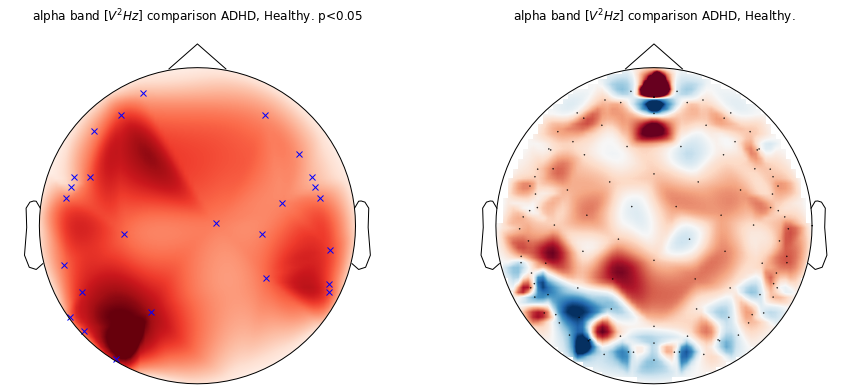

In [179]:
topography_plot_of_significance(list_channels=list_alpha,
            signal_adhd=alpha_signals_adhd,
            signal_healthy=alpha_signals_healthy,
            title_test="alpha",
            th=0.05)

<div style="background-color:#021A36;color:white;border-radius: 15px;padding:10px">
    <h3>Are the $\beta$ signals statistically different between healthy and ADHD?</h3>
</div>

In [29]:
beta_signals_adhd=beta_signals.loc[target_adhd.index]
beta_signals_healthy =beta_signals.loc[target_healthy.index]



<div style="background-color:#021A36;color:white;border-radius: 15px;padding:10px">
    <h3>Print t-test for $\beta$ band Healthy vs ADHD</h3>
</div>

In [30]:
print_ttest(list_channels=list_beta,
            signal_adhd=beta_signals_adhd,
            signal_healthy=beta_signals_healthy,
            title_test="beta",
            th=0.08)

****************************************************************************************************
signficance beta test channel 5  label: E3
0.06250888482762441
mean beta power ADHD 0.022063860837843043
mean beta power Healthy 0.012379174588201003
****************************************************************************************************
****************************************************************************************************
signficance beta test channel 133  label: E74
0.06286530494284358
mean beta power ADHD 0.023602677865843
mean beta power Healthy 0.018855200583904035
****************************************************************************************************
****************************************************************************************************
signficance beta test channel 191  label: E108
0.053461441519050794
mean beta power ADHD 0.022298901482160214
mean beta power Healthy 0.01449887139111173
*****************************************


<div style="background-color:#021A36;color:white;border-radius: 15px;padding:10px">
    <h3>Generate 3-D plot for the Beta comparison</h3>
</div>

In [31]:
three_d_plot_of_significance(list_channels=list_beta,
            signal_adhd=beta_signals_adhd,
            signal_healthy=beta_signals_healthy,
            title_test="beta",
            th=0.08)

<img src='./img_ID_44/rotation_beta_band.gif'>

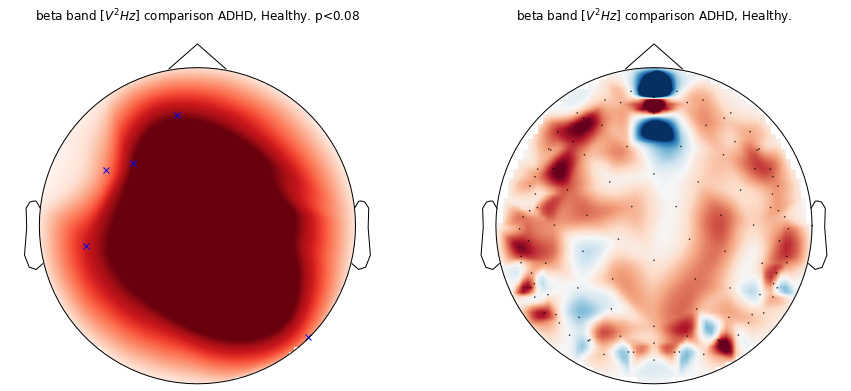

In [181]:
topography_plot_of_significance(list_channels=list_beta,
            signal_adhd=beta_signals_adhd,
            signal_healthy=beta_signals_healthy,
            title_test="beta",
            th=0.08)

<div style="background-color:#021A36;color:white;border-radius: 15px;padding:10px">
    <h3>Are the interaction of $\alpha$ and $\beta$ signals statistically different between healthy and ADHD?</h3>
</div>

In [33]:

temp_alpha_signal_adhd=alpha_signals_adhd.rename(columns={list_alpha[each]:each for each in range(0,len(list_alpha))})
temp_beta_signal_adhd=beta_signals_adhd.rename(columns={ list_beta[each]:each for each in range(0,len(list_beta))})

temp_alpha_signal_healthy=alpha_signals_healthy.rename(columns={list_alpha[each]:each for 
                                                             each in range(0,len(list_alpha))})

temp_beta_signal_healthy=beta_signals_healthy.rename(columns={ list_beta[each]:each for
                                                            each in range(0,len(list_beta))})



<div style="background-color:#021A36;color:white;border-radius: 15px;padding:10px">
    <h3>Print t-test for $\alpha$ times $\beta$ signals band Healthy vs ADHD</h3>
</div>

In [34]:
print_ttest(list_channels=temp_alpha_signal_healthy.columns,
            signal_adhd=temp_alpha_signal_adhd*temp_beta_signal_adhd,
            signal_healthy=temp_alpha_signal_healthy*temp_beta_signal_healthy,
            title_test="alpha_beta",
            th=0.05)

****************************************************************************************************
signficance alpha_beta test channel 1  label: E2
0.04633260413490514
mean alpha_beta power ADHD 0.0016505483291937683
mean alpha_beta power Healthy 0.0004999933028140056
****************************************************************************************************
****************************************************************************************************
signficance alpha_beta test channel 2  label: E3
0.025863506535105853
mean alpha_beta power ADHD 0.0024970073883372806
mean alpha_beta power Healthy 0.0005131838469139116
****************************************************************************************************
****************************************************************************************************
signficance alpha_beta test channel 25  label: E27
0.044154485273970534
mean alpha_beta power ADHD 0.002217694016061016
mean alpha_beta power Healthy 0.00



<div style="background-color:#021A36;color:white;border-radius: 15px;padding:10px">
    <h3>Generate 3-D plot for the $\alpha$ times $\beta$ comparison</h3>
</div>

In [35]:
three_d_plot_of_significance(list_channels=temp_alpha_signal_healthy.columns,
            signal_adhd=temp_alpha_signal_adhd*temp_beta_signal_adhd,
            signal_healthy=temp_alpha_signal_healthy*temp_beta_signal_healthy,
            title_test="alpha_beta",
            th=0.05)

<img src='./img_ID_44/rotation_alpha_beta_band.gif'>

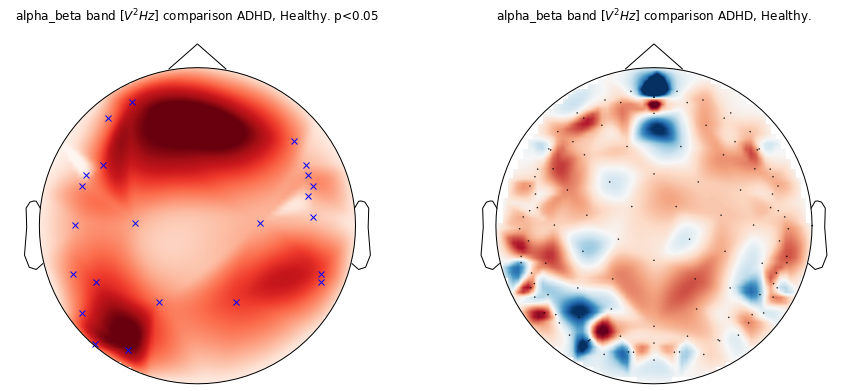

In [182]:
topography_plot_of_significance(list_channels=temp_alpha_signal_healthy.columns,
            signal_adhd=temp_alpha_signal_adhd*temp_beta_signal_adhd,
            signal_healthy=temp_alpha_signal_healthy*temp_beta_signal_healthy,
            title_test="alpha_beta",
            th=0.05)

<div style="background-color:#021A36;color:white;border-radius: 15px;padding:10px">
    <h3>Are the ratio of $\beta$ and $\alpha$ signals statistically different between healthy and ADHD?</h3>
</div>


<div style="background-color:#021A36;color:white;border-radius: 15px;padding:10px">
    <h3>Print t-test for $\alpha$ / $\beta$ signals band Healthy vs ADHD</h3>
</div>


In [36]:

print_ttest(list_channels=temp_alpha_signal_healthy.columns,
            signal_adhd=temp_beta_signal_adhd/temp_alpha_signal_adhd,
            signal_healthy=temp_beta_signal_healthy/temp_alpha_signal_healthy,
            title_test="beta_alpha_ratio",
            th=0.05)


<div style="background-color:#021A36;color:white;border-radius: 15px;padding:10px">
    <h3>Since nothing was printed, no channel beta/theta ratio is different, statistically speaking</h3>
</div>

<div style="background-color:#8b0000;color:white;border-radius: 15px;padding:10px">
    <h1>conclusion</h1>
    <ul>
        <li>The resnet18 CNN is picking on differences in alpha power over on left and right brain hemisphere with a small concentration on left occipital area. $p<0.05$</li>
        <li>The resnet18 CNN is picking on differences in beta power in the frontal left hemisphere. $p<0.08$
        </li>
        <li>The resnet18 CNN is picking on differences in alpha*beta power over the central area of the brain. $p<0.05$ 
        </li>
        <li>
            The darker regions on the activations plots of the CNN gives support to this results.
         </li>
    </ul>
</div>